# Import and Data Load

In [249]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [251]:
df = pd.read_csv('/content/drive/MyDrive/Research/BCS2 Lab/Papers With Code Test/Image Classification/CIFAR-10 Dataset/v3.csv')
df

,model,paper-title href,accuracy,parameters,github href,paper href,paper title,year,Industry Affiliation,Academia Affiliation,Country,Extra Training Data
0,ViT-H/14,https://paperswithcode.com/paper/an-image-is-w...,99.50±0.06,632M,https://paperswithcode.com/paper/an-image-is-w...,https://paperswithcode.com/paper/an-image-is-w...,An Image is Worth 16x16 Words: Transformers fo...,2020,Google,NaN,NaN,Yes
1,CaiT-M-36 U 224,https://paperswithcode.com/paper/going-deeper-...,99.4,NaN,https://paperswithcode.com/paper/going-deeper-...,https://paperswithcode.com/paper/going-deeper-...,Going deeper with Image Transformers,2021,Facebook AI Research,Sorbonne University,NaN,Yes
2,CvT-W24,https://paperswithcode.com/paper/cvt-introduci...,99.39,NaN,https://paperswithcode.com/paper/cvt-introduci...,https://paperswithcode.com/paper/cvt-introduci...,CvT: Introducing Convolutions to Vision Transf...,2021,Microsoft Cloud AI,McGill University,NaN,Yes
3,BiT-L,https://paperswithcode.com/paper/large-scale-l...,99.37,NaN,https://paperswithcode.com/paper/large-scale-l...,https://paperswithcode.com/paper/large-scale-l...,Big Transfer (BiT): General Visual Representat...,2019,Google,NaN,NaN,Yes
4,CeiT-S,https://paperswithcode.com/paper/incorporating...,99.1,NaN,https://paperswithcode.com/paper/incorporating...,https://paperswithcode.com/paper/incorporating...,Incorporating Convolution Designs into Visual ...,2021,SenseTime,"Nanyang Technological University, HKUST",NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
171,Hybrid PiN,https://paperswithcode.com/paper/vision-xforme...,74,0.990298M,https://paperswithcode.com/paper/vision-xforme...,https://paperswithcode.com/paper/vision-xforme...,Vision Xformers: Efficient Attention for Image...,2021,NaN,IIT Bombay,NaN,No
172,Vision Nystromformer,https://paperswithcode.com/paper/vision-xforme...,65.06,0.530970M,https://paperswithcode.com/paper/vision-xforme...,https://paperswithcode.com/paper/vision-xforme...,Vision Xformers: Efficient Attention for Image...,2021,NaN,IIT Bombay,NaN,No
173,ANODE,https://paperswithcode.com/paper/augmented-neu...,60.6,NaN,https://paperswithcode.com/paper/augmented-neu...,https://paperswithcode.com/paper/augmented-neu...,Augmented Neural ODEs,2019,NaN,University of Oxford,NaN,No
174,ViT-L/16,https://paperswithcode.com/paper/an-image-is-w...,99.42±0.03,307M,https://paperswithcode.com/paper/an-image-is-w...,https://paperswithcode.com/paper/an-image-is-w...,An Image is Worth 16x16 Words: Transformers fo...,2020,Google Brain,NaN,NaN,Yes


# Industry Analysis

In [252]:
industry = df['Industry Affiliation']
industry

0                   Google 
1      Facebook AI Research
2        Microsoft Cloud AI
3                   Google 
4                 SenseTime
               ...         
171                     NaN
172                     NaN
173                     NaN
174            Google Brain
175                     NaN
Name: Industry Affiliation, Length: 176, dtype: object

In [253]:
def isNaN (num):
  return num!=num

unique_industry = {}
for i in industry:
  if not isNaN(i):
    j = i.split(', ')
    for k in j:
      k = k.strip()
      if k not in unique_industry:
        count = 1
        unique_industry[k] = count
      else:
        count = unique_industry[k]
        count = count + 1
        unique_industry[k] = count 
print('Unique Number of Industrial Companies: ' + str(len(unique_industry)))
industry_count = sorted(unique_industry.items(), key = lambda kv: kv[1], reverse = True)
total_count_1 = 0
for i in unique_industry.values():
  total_count_1 = total_count_1 + i
print('Total Industry Appearance: ' + str(total_count_1))
# unique_industry # sorts based on keys 
industry_count  # sorts based on values

Unique Number of Industrial Companies: 34
Total Industry Appearance: 98


[('Google', 16),
 ('Facebook AI Research', 16),
 ('Google Brain', 15),
 ('PicsArt Inc.', 5),
 ('Valeo', 4),
 ('SenseTime', 3),
 ('Samsung', 3),
 ('Microsoft', 3),
 ('Huawei Inc.', 2),
 ('Xiaomi', 2),
 ('Facebook', 2),
 ('Momenta', 2),
 ('Helmholtz AI', 2),
 ('Technicolor', 2),
 ('Indico', 2),
 ('Microsoft Cloud AI', 1),
 ('Microsoft Asia', 1),
 ('Amazon', 1),
 ('Kakao Brain', 1),
 ('Futurewei', 1),
 ('Thales', 1),
 ('Google AI', 1),
 ('Line Plus Corp.', 1),
 ('Naver Corp.', 1),
 ('Kongsberg Seatex', 1),
 ('Arvenware', 1),
 ('Sensifai', 1),
 ('Elecholic', 1),
 ('Lunit Inc.', 1),
 ('Element AI', 1),
 ('DeepMind', 1),
 ('Intel Corp.', 1),
 ('Adobe Research', 1),
 ('Denso Corp.', 1)]

In [254]:
industry_country = {}

# collecting older ones
industry_country_csv = pd.read_csv('/content/drive/MyDrive/Research/BCS2 Lab/Papers With Code Test/updated_industry_country.csv', encoding='latin-1')
industry_country_already_enlisted = {}

for i in range(len(industry_country_csv['Industry'])):
  industry_country_already_enlisted[industry_country_csv['Industry'][i]] = industry_country_csv['Country'][i]

# creating new one

# industry_country_already_enlisted['AITRICS'] = 'South Korea'
# industry_country_already_enlisted['Ant Group'] = 'China'
# industry_country_already_enlisted['Denso Corp.'] = 'Japan'
# industry_country_already_enlisted['Elan Microelectronics Corp.'] = 'Taiwan'
# industry_country_already_enlisted['GE Global Research'] = 'USA'
# industry_country_already_enlisted['Intellifusion Inc.'] = 'China'
# industry_country_already_enlisted['Malong LLC'] = 'USA'
# industry_country_already_enlisted['Pinterest'] = 'USA'
# industry_country_already_enlisted['Qualcomm'] = 'USA'
# industry_country_already_enlisted['Tencent'] = 'China'
# industry_country_already_enlisted['TuSimple'] = 'China'
# industry_country_already_enlisted['XL8 Inc.'] = 'USA'

for i in unique_industry:
  if i in industry_country_already_enlisted:
    industry_country[i] = industry_country_already_enlisted[i]

print(len(industry_country))
industry_country

34


{'Adobe Research': 'USA',
 'Amazon': 'USA',
 'Arvenware': 'Iran',
 'DeepMind': 'UK',
 'Denso Corp.': 'Japan',
 'Elecholic': 'China',
 'Element AI': 'Canada',
 'Facebook': 'USA',
 'Facebook AI Research': 'USA',
 'Futurewei': 'USA',
 'Google': 'USA',
 'Google AI': 'USA',
 'Google Brain': 'USA',
 'Helmholtz AI': 'Germany',
 'Huawei Inc.': 'China',
 'Indico': 'USA',
 'Intel Corp.': 'USA',
 'Kakao Brain': 'South Korea',
 'Kongsberg Seatex': 'Norway',
 'Line Plus Corp.': 'South Korea',
 'Lunit Inc.': 'South Korea',
 'Microsoft': 'USA',
 'Microsoft Asia': 'China',
 'Microsoft Cloud AI': 'USA',
 'Momenta': 'China',
 'Naver Corp.': 'South Korea',
 'PicsArt Inc.': 'USA',
 'Samsung': 'South Korea',
 'SenseTime': 'Hong Kong',
 'Sensifai': 'Belgium',
 'Technicolor': 'France',
 'Thales': 'France',
 'Valeo': 'France',
 'Xiaomi': 'China'}

In [255]:
country_count = {}
for i in industry_count:
  j = i[0]
  for k in industry_country.keys():
    if j == k:
      country = industry_country[k]
      if country not in country_count:
        country_count[country] = i[1]
      else:
        count = country_count[country]
        count = count + i[1]
        country_count[country] = count

########## Custom Modifying Based on Regional Office ##########
# country_count['Netherlands'] = 1
# country_count['USA'] = country_count['USA']-1;
########## Custom Modifying Based on Regional Office ##########

country_count_sort = sorted(country_count.items(), key = lambda kv: kv[1], reverse = True)

print(sum(i[1] for i in country_count_sort))
country_count_sort

98


[('USA', 65),
 ('China', 8),
 ('France', 7),
 ('South Korea', 7),
 ('Hong Kong', 3),
 ('Germany', 2),
 ('Norway', 1),
 ('Iran', 1),
 ('Belgium', 1),
 ('Canada', 1),
 ('UK', 1),
 ('Japan', 1)]

# Academia Analysis

In [256]:
academia = df['Academia Affiliation']
academia

0                                          NaN
1                          Sorbonne University
2                            McGill University
3                                          NaN
4      Nanyang Technological University, HKUST
                        ...                   
171                                 IIT Bombay
172                                 IIT Bombay
173                       University of Oxford
174                                        NaN
175               Universitat Rovira i Virgili
Name: Academia Affiliation, Length: 176, dtype: object

In [257]:
unique_academia = {}
for i in academia:
  if not isNaN(i):
    j = i.split(', ')
    for k in j:
      k = k.strip()
      if k is not '':
        if k not in unique_academia:
          count = 1
          unique_academia[k] = count
        else:
          count = unique_academia[k]
          count = count + 1
          unique_academia[k] = count 
print('Unique Number of Academic Institutes: ' + str(len(unique_academia)))
academia_count = sorted(unique_academia.items(), key = lambda kv: kv[1], reverse = True)

total_count_2 = 0
for i in unique_academia.values():
  total_count_2 = total_count_2 + i
print('Total Academia Appearance: ' + str(total_count_2))
academia_count
# unique_academia

Unique Number of Academic Institutes: 108
Total Academia Appearance: 221


[('UIUC', 7),
 ('UCLA', 7),
 ('Sorbonne University', 6),
 ('Tsinghua University', 6),
 ('Purdue University', 6),
 ('MIT', 6),
 ('IIT Bombay', 6),
 ('The Chinese University of Hong Kong', 5),
 ('University of Oregon', 5),
 ('Michigan State University', 5),
 ('University of Southern California', 5),
 ('Cornell University', 5),
 ('University of Toronto', 5),
 ('HKUST', 4),
 ('University of Chinese Academy of Sciences', 4),
 ('Zhejiang University', 4),
 ('Southern University of Science and Technology', 4),
 ('Carnegie Mellon University', 4),
 ('Peking University', 4),
 ('Nanyang Technological University', 3),
 ('UC San Diego', 3),
 ('National Chiao Tung University', 3),
 ('University of Freiburg', 3),
 ('Harvard University', 3),
 ('New York University', 3),
 ('IDSIA', 3),
 ('University of Montreal', 3),
 ('Inria', 2),
 ('Beihang University', 2),
 ('University of Ottawa', 2),
 ('Stanford University', 2),
 ('University of Oxford', 2),
 ('Mila - Quebec AI Institute', 2),
 ('ETH Zurich', 2),
 

In [258]:
academia_country = {}

# collecting older ones
academia_country_csv = pd.read_csv('/content/drive/MyDrive/Research/BCS2 Lab/Papers With Code Test/updated_academia_country.csv', encoding='latin-1')
academia_country_already_enlisted = {}

for i in range(len(academia_country_csv['University'])):
  academia_country_already_enlisted[academia_country_csv['University'][i]] = academia_country_csv['Country'][i]

# print(len(academia_country_already_enlisted))

# creating new one

# academia_country_already_enlisted['Arizona State University'] = 'USA'
# academia_country_already_enlisted['BUPT'] = 'China'
# academia_country_already_enlisted['ETRI'] = 'South Korea'
# academia_country_already_enlisted['Hacettepe University'] = 'Turkey'
# academia_country_already_enlisted['Institute of Information Science Academia Sinica'] = 'Taiwan'
# academia_country_already_enlisted['KAIST'] = 'South Korea'
# academia_country_already_enlisted['Macau University of Science and Technology'] = 'China'
# academia_country_already_enlisted['Middle East Technical University'] = 'Turkey'
# academia_country_already_enlisted['Northwestern Polytechnical University'] = 'China'
# academia_country_already_enlisted['Peng Cheng Laboratory'] = 'China'
# academia_country_already_enlisted['Providence University'] = 'Taiwan'
# academia_country_already_enlisted['RIKEN'] = 'Japan'
# academia_country_already_enlisted['South China University of Technology'] = 'China'
# academia_country_already_enlisted['Shenzhen Institutes of Advanced Technology'] = 'China'
# academia_country_already_enlisted['Temple University'] = 'USA'
# academia_country_already_enlisted['UNC Chapel Hill'] = 'USA'
# academia_country_already_enlisted['University of Michigan'] = 'USA'
# academia_country_already_enlisted['University of Warwick'] = 'UK'
# academia_country_already_enlisted['University of Waterloo'] = 'Canada'
# academia_country_already_enlisted['University of Winscon-Madison'] = 'USA'
# academia_country_already_enlisted['Waseda University'] = 'Japan'
# academia_country_already_enlisted['Westlake University'] = 'China'
# academia_country_already_enlisted['Xiamen University'] = 'China'


for i in unique_academia:
  if i in academia_country_already_enlisted:
    academia_country[i] = academia_country_already_enlisted[i]

print(len(academia_country))
academia_country

108


{'Aalto Univeristy': 'Finland',
 'Aix Marseille University': 'France',
 'Beihang University': 'China',
 'Beijing Academy of Intelligence': 'China',
 'Beijing National Research Center for Information Science and Technology': 'China',
 'Brown University': 'USA',
 'CNRS': 'France',
 'Carnegie Mellon University': 'USA',
 'Cornell University': 'USA',
 'Czech Technical University in Prague': 'Czech Republic',
 'Delft University of Technology': 'Netherlands',
 'EPFL': 'Switzerland',
 'ETH Zurich': 'Switzerland',
 'Ecole Normale': 'France',
 'EcoledesPonts Paris Tech': 'France',
 'Federal University of Rio de Janeiro': 'Brazil',
 'HKUST': 'Hong Kong',
 'Harvard University': 'USA',
 'Higher School of Economics': 'Russia',
 'IDSIA': 'Switzerland',
 'IIT Bombay': 'India',
 'Imperial College London': 'UK',
 'Inria': 'France',
 'Institut Polytechnique de Paris': 'France',
 'Institute For Research In Fundamental Sciences': 'Iran',
 'Islamic Azad University': 'Iran',
 'Jinan University': 'China',
 'J

In [259]:
country_count_2 = {}
for i in academia_count:
  j = i[0]
  for k in academia_country.keys():
    if j == k:
      country = academia_country[k]
      if country not in country_count_2:
        country_count_2[country] = i[1]
      else:
        count = country_count_2[country]
        count = count + i[1]
        country_count_2[country] = count
country_count_2_sort = sorted(country_count_2.items(), key = lambda kv: kv[1], reverse = True)

print(sum(i[1] for i in country_count_2_sort))
country_count_2_sort

221


[('USA', 80),
 ('China', 35),
 ('Canada', 16),
 ('France', 15),
 ('India', 9),
 ('Hong Kong', 9),
 ('Switzerland', 9),
 ('UK', 8),
 ('Germany', 6),
 ('Australia', 5),
 ('Singapore', 4),
 ('Taiwan', 4),
 ('Russia', 4),
 ('Iran', 4),
 ('Netherlands', 3),
 ('South Korea', 2),
 ('Portugal', 1),
 ('Poland', 1),
 ('Finland', 1),
 ('Brazil', 1),
 ('Greece', 1),
 ('Czech Republic', 1),
 ('Austria', 1),
 ('Spain', 1)]

# Country

In [260]:
def isNaN (num):
  return num!=num

# filling up countries with industry affiliation
country_list = []
for i in df['Industry Affiliation']:
  #print(i)
  countries = []
  if not isNaN(i):
    i = i.strip()
    i = i.split(', ')
    for j in i:
      if j in industry_country.keys():
        if industry_country[j] not in countries:
          countries.append(industry_country[j])
    #print(countries)
    country_list.append(countries)
  else:
    #print(i, countries)
    country_list.append(countries)
print(country_list)

# filling up countries with academia affiliation
j = 0
for i in df['Academia Affiliation']:
    already_country = country_list[j]
    if not isNaN(i):
      i = i.strip()
      i = i.split(', ')
      for k in i:
        if k in academia_country.keys():
          if academia_country[k] not in already_country:
            already_country.append(academia_country[k])
      #print(already_country)
      country_list[j] = already_country
    else:
      #print(already_country)
      country_list[j] = already_country

    j=j+1
print(country_list)

[['USA'], ['USA'], ['USA'], ['USA'], ['Hong Kong'], ['China'], ['China'], ['USA'], ['USA'], ['USA'], ['USA'], ['USA'], ['Hong Kong'], [], ['USA'], ['USA'], ['USA'], [], ['USA', 'France'], ['USA'], ['South Korea'], [], ['USA'], ['USA'], ['USA'], ['USA'], ['China'], [], ['Hong Kong'], [], [], [], [], ['USA'], ['South Korea'], ['China'], ['USA'], ['USA'], ['USA'], [], ['USA'], ['USA', 'France'], [], ['USA'], ['USA'], ['USA'], [], ['USA'], ['USA'], [], ['USA'], ['China'], [], ['Germany'], ['USA'], ['France'], [], ['USA'], ['China'], ['USA'], [], ['USA'], [], ['USA'], [], [], [], ['USA'], ['USA'], ['USA'], ['South Korea'], ['South Korea'], [], [], [], [], ['USA'], ['South Korea'], [], [], [], ['USA'], ['China'], [], [], [], ['USA'], ['Norway'], [], [], ['Iran', 'France'], [], [], ['USA'], [], ['Germany'], [], ['USA'], ['France', 'Belgium'], ['USA'], [], ['China'], ['USA'], ['USA'], ['South Korea'], ['USA'], [], ['France'], [], [], ['USA'], [], [], ['USA'], [], [], ['Canada', 'USA'], [], [],

In [261]:
country_string = []
for i in country_list:
  string = ', '.join(i)
  country_string.append(string)
df['Country'] = country_string
df

,model,paper-title href,accuracy,parameters,github href,paper href,paper title,year,Industry Affiliation,Academia Affiliation,Country,Extra Training Data
0,ViT-H/14,https://paperswithcode.com/paper/an-image-is-w...,99.50±0.06,632M,https://paperswithcode.com/paper/an-image-is-w...,https://paperswithcode.com/paper/an-image-is-w...,An Image is Worth 16x16 Words: Transformers fo...,2020,Google,NaN,USA,Yes
1,CaiT-M-36 U 224,https://paperswithcode.com/paper/going-deeper-...,99.4,NaN,https://paperswithcode.com/paper/going-deeper-...,https://paperswithcode.com/paper/going-deeper-...,Going deeper with Image Transformers,2021,Facebook AI Research,Sorbonne University,"USA, France",Yes
2,CvT-W24,https://paperswithcode.com/paper/cvt-introduci...,99.39,NaN,https://paperswithcode.com/paper/cvt-introduci...,https://paperswithcode.com/paper/cvt-introduci...,CvT: Introducing Convolutions to Vision Transf...,2021,Microsoft Cloud AI,McGill University,USA,Yes
3,BiT-L,https://paperswithcode.com/paper/large-scale-l...,99.37,NaN,https://paperswithcode.com/paper/large-scale-l...,https://paperswithcode.com/paper/large-scale-l...,Big Transfer (BiT): General Visual Representat...,2019,Google,NaN,USA,Yes
4,CeiT-S,https://paperswithcode.com/paper/incorporating...,99.1,NaN,https://paperswithcode.com/paper/incorporating...,https://paperswithcode.com/paper/incorporating...,Incorporating Convolution Designs into Visual ...,2021,SenseTime,"Nanyang Technological University, HKUST","Hong Kong, Singapore",Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
171,Hybrid PiN,https://paperswithcode.com/paper/vision-xforme...,74,0.990298M,https://paperswithcode.com/paper/vision-xforme...,https://paperswithcode.com/paper/vision-xforme...,Vision Xformers: Efficient Attention for Image...,2021,NaN,IIT Bombay,India,No
172,Vision Nystromformer,https://paperswithcode.com/paper/vision-xforme...,65.06,0.530970M,https://paperswithcode.com/paper/vision-xforme...,https://paperswithcode.com/paper/vision-xforme...,Vision Xformers: Efficient Attention for Image...,2021,NaN,IIT Bombay,India,No
173,ANODE,https://paperswithcode.com/paper/augmented-neu...,60.6,NaN,https://paperswithcode.com/paper/augmented-neu...,https://paperswithcode.com/paper/augmented-neu...,Augmented Neural ODEs,2019,NaN,University of Oxford,UK,No
174,ViT-L/16,https://paperswithcode.com/paper/an-image-is-w...,99.42±0.03,307M,https://paperswithcode.com/paper/an-image-is-w...,https://paperswithcode.com/paper/an-image-is-w...,An Image is Worth 16x16 Words: Transformers fo...,2020,Google Brain,NaN,USA,Yes


In [262]:
df.to_csv('/content/drive/MyDrive/Research/BCS2 Lab/Papers With Code Test/Image Classification/ImageNet/v3.csv')

# Result and Visualization

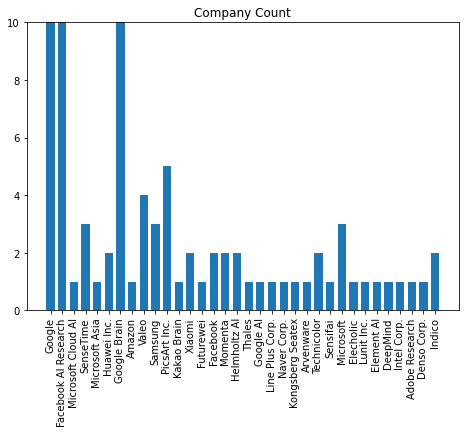

In [ ]:
# industry_count
xi_companies = []
yi_company_count = []
for i in unique_industry.keys():
  xi_companies.append(i)
  yi_company_count.append(unique_industry[i])
# yi_company_count
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.ylim(0, 10)
ax.bar(xi_companies, yi_company_count, width=0.7)
plt.xticks(rotation = 90)
plt.title('Company Count')
plt.show()

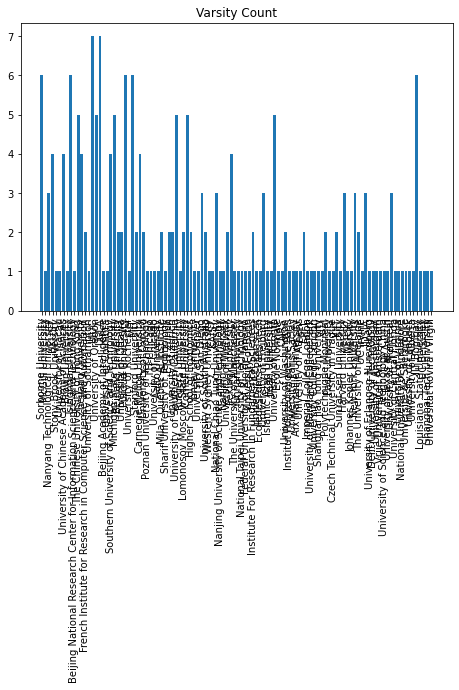

In [ ]:
# academia_count
xa_varsities = []
ya_varsity_count = []
for i in unique_academia.keys():
  xa_varsities.append(i)
  ya_varsity_count.append(unique_academia[i])
# xa_companies
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(xa_varsities, ya_varsity_count)
# plt.ylim(0, 20)
plt.xticks(rotation = 90)
plt.title('Varsity Count')
plt.show()

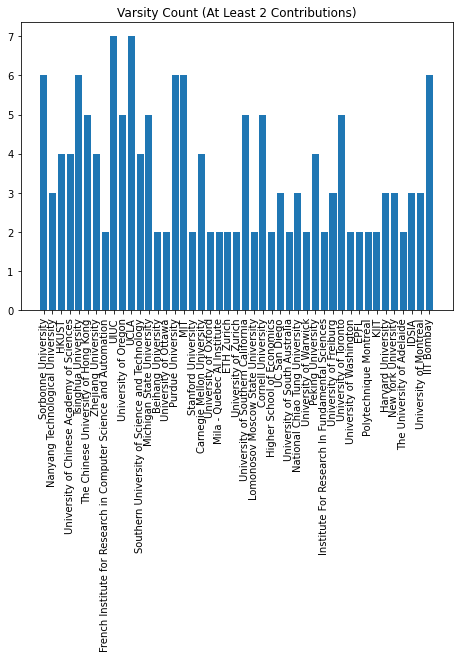

In [ ]:
clear_academia_count = {}
for i in unique_academia.keys():
    if unique_academia[i] > 1:
        clear_academia_count[i] = unique_academia[i]
clear_academia_count

xa_varsities = []
ya_varsity_count = []
for i in clear_academia_count.keys():
  xa_varsities.append(i)
  ya_varsity_count.append(clear_academia_count[i])
# xa_companies
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(xa_varsities, ya_varsity_count)
plt.xticks(rotation = 90)
plt.title('Varsity Count (At Least 2 Contributions)')
plt.show()

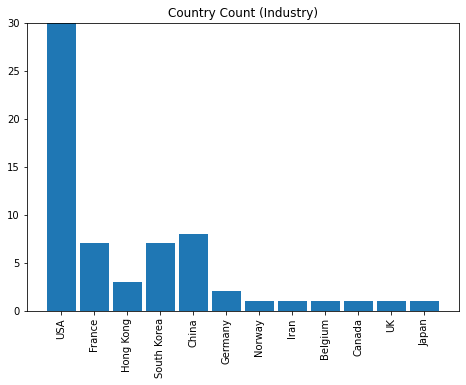

In [ ]:
# country_count
import matplotlib as mt
xi_countries = []
yi_country_count = []
for i in country_count.keys():
  xi_countries.append(i)
  yi_country_count.append(country_count[i])
# yi_company_count
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.ylim(0, 30)
# rec = mt.patches.Rectangle((0,0), 10000000, 300)
ax.bar(xi_countries, yi_country_count, width = 0.9)
plt.xticks(rotation = 90)

plt.title('Country Count (Industry)')
plt.show()

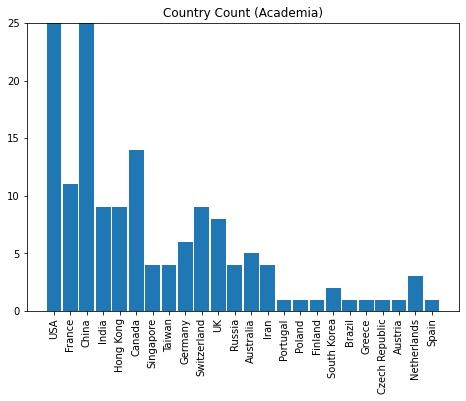

In [ ]:
# country_count
xa_countries = []
ya_country_count = []
for i in country_count_2.keys():
  xa_countries.append(i)
  ya_country_count.append(country_count_2[i])
# yi_company_count
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(xa_countries, ya_country_count, width = 0.9)
plt.ylim(0, 25)
plt.xticks(rotation = 90)
plt.title('Country Count (Academia)')
plt.show()

# Parameters-GDP

In [264]:
param_list = df['parameters']
param_list

0           632M
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
171    0.990298M
172    0.530970M
173          NaN
174         307M
175          NaN
Name: parameters, Length: 176, dtype: object

In [265]:
param_countries = {}
for i in range(len(df)):
  if not isNaN(param_list[i]):
    param_countries[param_list[i]] = df['Country'][i]
param_countries

{'0.530970M': 'India',
 '0.623706M': 'India',
 '0.67M': 'Netherlands',
 '0.906075M': 'India',
 '0.990298M': 'India',
 '1.1M': 'China',
 '11.4M': 'China',
 '121M': 'USA',
 '18M': 'USA',
 '2.1M': 'USA',
 '20.03M': 'USA',
 '20M': 'Portugal',
 '23M': 'China, USA',
 '24M': 'USA',
 '25.6M': 'USA',
 '25M': 'USA',
 '26.21M': 'South Korea',
 '26.3M': 'Hong Kong, China',
 '26M': 'South Korea',
 '27.22M': 'China, Canada',
 '3.17M': 'USA',
 '3.1M': 'China',
 '3.76M': 'USA',
 '307M': 'USA',
 '32.6M': 'Hong Kong, China',
 '33.5M': 'USA',
 '36.5M': 'USA',
 '36.7M': 'Hong Kong, China',
 '4.3M': 'USA',
 '4.6M': 'China, USA',
 '44.1M': 'USA',
 '5.5M': 'China',
 '5.7M': 'USA',
 '54M': 'China',
 '55.9M': 'Hong Kong, China',
 '55M': 'USA',
 '6.2M': 'China, USA',
 '6.9M': 'China, USA',
 '632M': 'USA',
 '64M': 'USA',
 '65.6M': 'China',
 '86M': 'USA, France',
 '87M': 'USA',
 '90.1M': 'USA'}

In [266]:
# GDP Track
country_set = []
for i in param_countries.values():
  i = i.strip()
  i = i.split(', ')
  for j in i:
    if j not in country_set:
      country_set.append(j)
country_set

['USA',
 'China',
 'France',
 'Hong Kong',
 'South Korea',
 'Portugal',
 'Canada',
 'Netherlands',
 'India']

In [267]:
### GDP Listing
gdps = pd.read_csv('/content/drive/MyDrive/Research/BCS2 Lab/Papers With Code Test/gdp.csv')
gdps

,rank,country,imfGDP,unGDP,gdpPerCapita,pop
0,1,USA,2.219810e+13,1.862450e+13,66678.0263,332915.073
1,2,China,1.546810e+13,1.121830e+13,10710.3777,1444216.107
2,3,Japan,5.495420e+12,4.936210e+12,43596.8659,126050.804
3,4,Germany,4.157120e+12,3.477800e+12,49548.2308,83900.473
4,5,India,3.257720e+12,2.259640e+12,2337.9495,1393409.038
...,...,...,...,...,...,...
206,207,Pakistan,0.000000e+00,2.825060e+11,1254.4675,225199.937
207,208,Anguilla,0.000000e+00,3.375205e+08,22327.2124,15.117
208,209,Sudan,0.000000e+00,8.288740e+10,1845.6600,44909.353
209,210,Syria,0.000000e+00,2.216308e+10,1212.7072,18275.702


In [268]:
key_list = list(param_countries.keys())
value_list = list(param_countries.values())

all_gdp = []
all_gdp_capita = []
all_param = []

for i in range(len(gdps)):
  if gdps['country'][i] in country_set:
          for j in value_list:
            k = j.strip()
            countr = k.split(', ')
            if gdps['country'][i] in countr:
              all_param.append(key_list[value_list.index(j)])
              all_gdp.append(gdps['imfGDP'][i])
              all_gdp_capita.append(gdps['gdpPerCapita'][i])
print(max(all_gdp), all_gdp)
print(max(all_gdp_capita), all_gdp_capita)
print(max(list(float(i.strip('M')) for i in all_param)), all_param)

22198100000000.0 [22198100000000.0, 22198100000000.0, 22198100000000.0, 22198100000000.0, 22198100000000.0, 22198100000000.0, 22198100000000.0, 22198100000000.0, 22198100000000.0, 22198100000000.0, 22198100000000.0, 22198100000000.0, 22198100000000.0, 22198100000000.0, 22198100000000.0, 22198100000000.0, 22198100000000.0, 22198100000000.0, 22198100000000.0, 22198100000000.0, 22198100000000.0, 22198100000000.0, 22198100000000.0, 22198100000000.0, 22198100000000.0, 15468100000000.0, 15468100000000.0, 15468100000000.0, 15468100000000.0, 15468100000000.0, 15468100000000.0, 15468100000000.0, 15468100000000.0, 15468100000000.0, 15468100000000.0, 15468100000000.0, 15468100000000.0, 15468100000000.0, 15468100000000.0, 15468100000000.0, 3257720000000.0, 3257720000000.0, 3257720000000.0, 3257720000000.0, 2876050000000.0, 1832490000000.0, 1744360000000.0, 1744360000000.0, 954931000000.0, 402034000000.0, 402034000000.0, 402034000000.0, 402034000000.0, 249912000000.0]
66678.0263 [66678.0263, 66678.

Text(0, 0.5, 'Number of Parameters in Million')

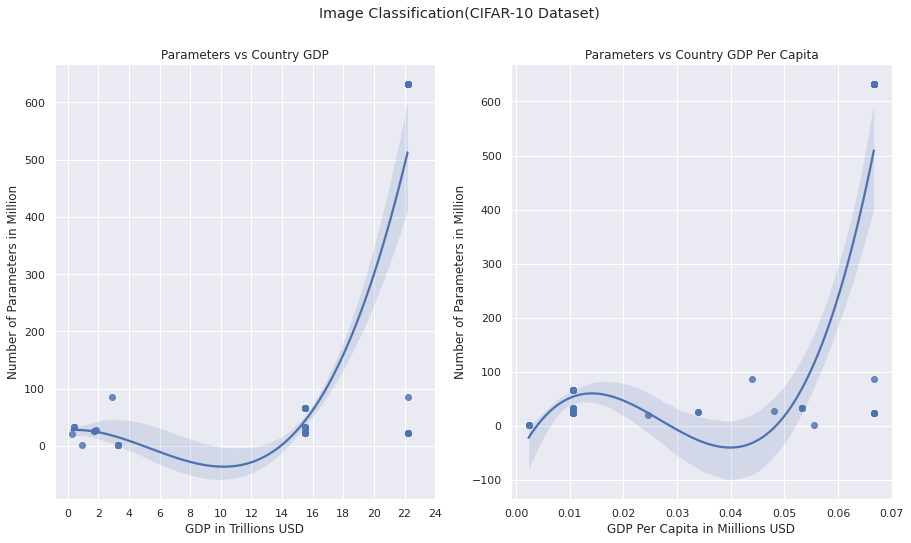

In [271]:
sns.set()

y_val = []
for i in all_param:
  i = float(i.strip('M'))
  y_val.append(i)
# print(y_val)

x1_val = []
for i in all_gdp:
  i = float(i)/1000000000000
  x1_val.append(i)
# print(x_val)

x2_val = []
for i in all_gdp_capita:
  i = float(i)/1000000
  x2_val.append(i)


# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# plt.scatter(x_val, y_val, marker='.')
# ax.xaxis.set_ticks(np.arange(0, 25, 2))


fig, axes = plt.subplots(1, 2, figsize = (15,8))

data = pd.DataFrame({ 
    'y_val': y_val,
    'x1_val': x1_val
})

ax1 = sns.regplot(x='x1_val', y='y_val', data=data, order = 3, ax=axes[0])

data2 = pd.DataFrame({ 
    'y_val': y_val,
    'x2_val': x2_val
})
ax2 = sns.regplot(x='x2_val', y='y_val', data=data2, order = 3, ax = axes[1])


ax1.set(xticks=(np.arange(0, 25, 2)))
ax2.set(xticks=(np.arange(0, 0.07, 0.01)))


fig.suptitle('Image Classification(CIFAR-10 Dataset)')

ax1.set_title('Parameters vs Country GDP')
ax2.set_title('Parameters vs Country GDP Per Capita')

ax1.set_xlabel('GDP in Trillions USD')
ax1.set_ylabel('Number of Parameters in Million')

ax2.set_xlabel('GDP Per Capita in Miillions USD')
ax2.set_ylabel('Number of Parameters in Million')

# ax1.tick_params(axis='x', labelrotation=45)
# ax2.tick_params(axis='x', labelrotation=45)
# plt.show()